# DA Mini Project
* 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
* 개요 :
```
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.


이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.
```
* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 활동적인 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음
        * target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

## 프로젝트 목표
- 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 <연장>할지 예측하기 위한 사전 파악

## 분석 방향 설정
- 누가 서비스 구독을 "연장"할까? (=예측의 근거가 될 수 있는 징후들을 데이터를 통해 찾기) 
    - 조사 시점에 이미 구독을 중단한 사람(p2, p4, p6)은 후순위로 고려 : 다른 프로젝트에서 다룰 영역 -> (ex) 재구독률 높이기
    - 결국 최근 3개월간 구독을 유지한 사람(p7), 중단했다가 최근 3개월 내 다시 돌아온 사람(p1, p3, p5)의 행동패턴 위주로 파악
- <u> 해당 서비스의 “구독 연장”은 곧 학습을 지속해나간다는 것을 의미</u>

## 분석 목표
- <b> "학습 지속성"</b>에 영향을 미칠 수 있는 요인 탐색
    - <font color=blue> <b> 사용자가 학습을 지속할 수 있는 환경</font>을 제공, 구성하기 위한 인사이트 도출에 주력
    - 본격적인 EDA에 앞서 심층분석을 위한 방향성 제시 : 1차 분석 실시 후 중요도를 고려하여 2차 분석 진행 예정 

---

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib 
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data3/mini.csv', sep=',')
data.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1


In [3]:
list(data.columns)

['user_id',
 'subscription_duration',
 'recent_login_time',
 'average_login_time',
 'average_time_per_learning_session',
 'monthly_active_learning_days',
 'total_completed_courses',
 'recent_learning_achievement',
 'abandoned_learning_sessions',
 'community_engagement_level',
 'preferred_difficulty_level',
 'subscription_type',
 'customer_inquiry_history',
 'payment_pattern',
 'target']

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [5]:
data.describe(include='all')

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000
unique,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,b919c29d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,Basic,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4992,5979,NaN,NaN,NaN
mean,NaN,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,NaN,NaN,2.010500,3.502900,0.619900
std,NaN,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,NaN,NaN,1.420983,2.311261,0.485435
min,NaN,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,NaN,NaN,1.000000,1.000000,0.000000
50%,NaN,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,NaN,NaN,2.000000,4.000000,1.000000
75%,NaN,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,NaN,NaN,3.000000,6.000000,1.000000


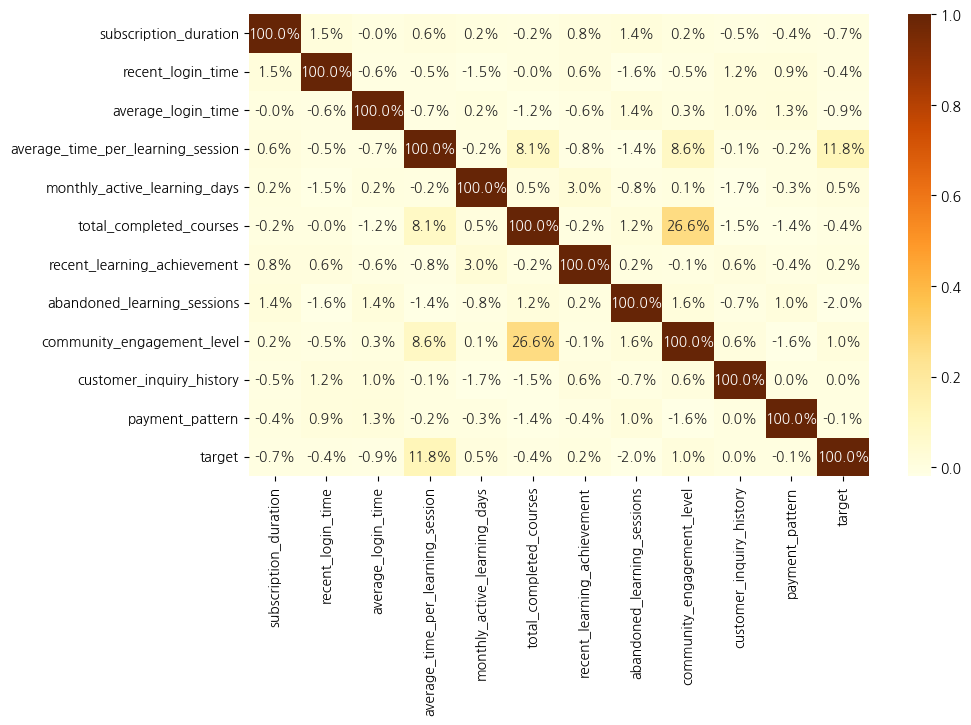

In [6]:
# 가볍게 상관관계 확인('user_id', 'preferred_difficulty_level', 'subscription_type' 컬럼 제외)

del_columns = ['user_id', 'preferred_difficulty_level', 'subscription_type']
corr_data = data.drop(del_columns, axis=1).select_dtypes(include=['int64', 'float64'])
corr = corr_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".1%", cmap='YlOrBr')
plt.show()

[참고] 비교적 상관이 있어보이는 조합
- community_engagement_level & total_completed_courses
- community_engagement_level & average_time_per_learning_session
- total_completed_courses & average_time_per_learning_session

## 1. payment_pattern & subscription_type

In [7]:
# 사용자의 payment_pattern 분포 파악 
count_pattern = data['payment_pattern'].value_counts()
print(count_pattern)

payment_pattern
1    1285
7    1284
0    1275
6    1268
5    1238
3    1230
4    1214
2    1206
Name: count, dtype: int64


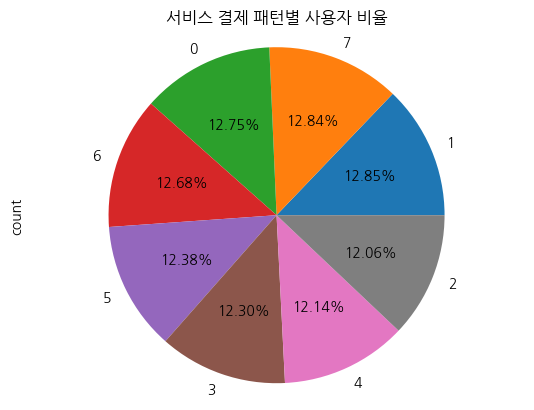

In [8]:
## 결제 패턴별 사용자 비율은 고르게 분포되어 있음
figure_size=(10,10)
pattern_counts = data['payment_pattern'].value_counts()

pattern_counts.plot.pie(autopct='%.2f%%')
plt.title("서비스 결제 패턴별 사용자 비율")
plt.axis('equal')
plt.show()

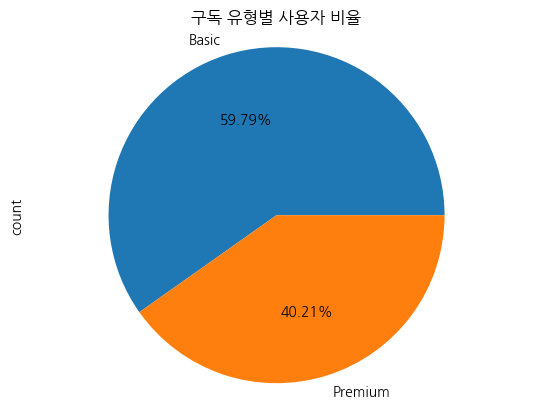

In [9]:
# 사용자의 subscription_type 분포 파악 
## 구독 유형별 사용자 비중 = 6:4
figure_size=(10,10)
pattern_counts = data['subscription_type'].value_counts()

pattern_counts.plot.pie(autopct='%.2f%%')
plt.title("구독 유형별 사용자 비율")
plt.axis('equal')
plt.show()

In [10]:
## (히트맵) payment_pattern & subscription_type
count_data = data.groupby(['payment_pattern', 'subscription_type']).size().reset_index(name='user_count')

In [11]:
# 피벗 테이블로 변환
pivot_data = count_data.pivot(index='payment_pattern', columns='subscription_type', values='user_count')

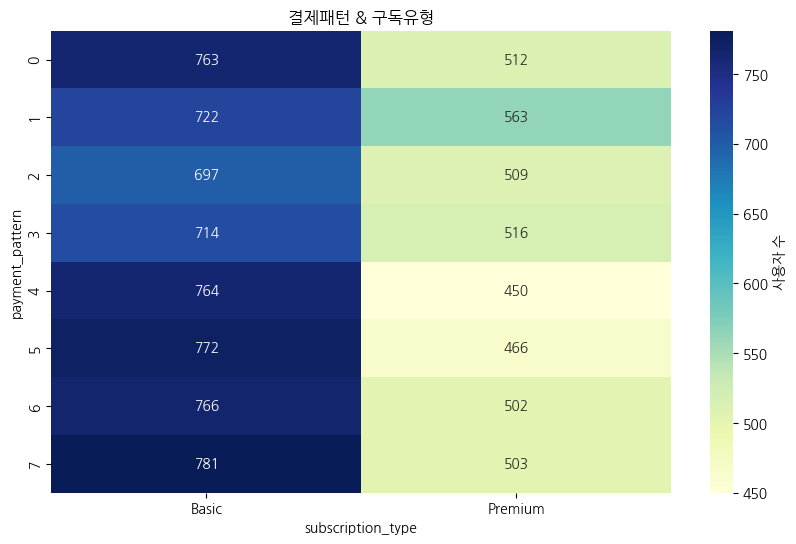

In [12]:
# 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': '사용자 수'})
plt.title('결제패턴 & 구독유형')
plt.show()

- 모든 결제패턴에서 Basic 타입을 더 많이 선택한 것으로 확인
- Basic은 'pattern 7'에 해당하는 사용자(3개월 full 결제)가 가장 많은 것으로 나타남
- -> 최근 3개월 모두 결제(p7) > 최근 3개월 중 2개월 결제(p5 > p6) > 첫 한달만 결제(p4) > 결제 건 없음(p0) > ... 
- Premium은 'p1' 사용자(마지막 한 달 만 결제)가 가장 많았고 'p4'(첫달만 결제), 'p5'(첫번째, 세번째달만 결제) 사용자가 가장 적음

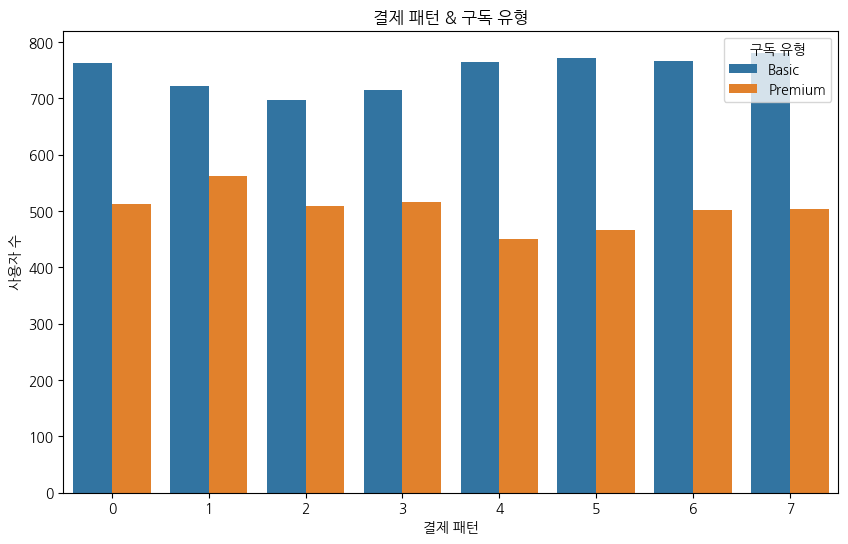

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='payment_pattern', hue='subscription_type', data=data)
plt.title('결제 패턴 & 구독 유형')
plt.xlabel('결제 패턴')
plt.ylabel('사용자 수')
plt.legend(title='구독 유형')
plt.show()

- [ 문제점 ] <b> 전체의 사용자 중 약 37%가 최근 3개월 이내 구독 해지</b> : 결제 패턴 p2, p4, p6 해당
- [ Basic : Premium = 6 : 4 ] "Premium 구독률"을 높이기 위한 목적의 분석이 추가적으로 필요해 보임.
- <b><font color=blue> (의견 1) p1(마지막 1달), p3(마지막 2달), p7(full) 유형을 '구독 연장' 우선순위 대상</b>으로 공략해야 함 (타겟 마케팅 필요)  
- <b><font color=blue> (의견 2) Premium 서비스 경험 후 중단 이력이 있는 사용자*</b>를 대상으로 유저 리서치를 진행하면 구독 연장에 도움이 될 인사이트 도출 가능성 있음
- <font color=blue>*</font> 최근 3개월 중 가운데 한 달만 결제한 'p2', 앞에 두 달만 결제한 'p6' 

## 2. subscription_duration (사용자가 서비스에 가입한 기간 (월))

In [14]:
data.describe(include='all')

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000
unique,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,b919c29d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,Basic,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4992,5979,NaN,NaN,NaN
mean,NaN,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,NaN,NaN,2.010500,3.502900,0.619900
std,NaN,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,NaN,NaN,1.420983,2.311261,0.485435
min,NaN,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,NaN,NaN,1.000000,1.000000,0.000000
50%,NaN,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,NaN,NaN,2.000000,4.000000,1.000000
75%,NaN,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,NaN,NaN,3.000000,6.000000,1.000000


- 서비스 가입기간 평균 12개월, 최소 1개월, 최대 23개월 

In [15]:
# subscription_duration이 3 미만인 사용자 비율 계산
subset_data = data[data['subscription_duration'] < 3]
ratio = len(subset_data) / len(data) * 100

print(f"서비스에 가입한 기간이 3개월 미만인 사용자 비율: {ratio:.2f}%")

서비스에 가입한 기간이 3개월 미만인 사용자 비율: 8.79%


### 2-1. 3개월 모두 결제한 사용자(p7) 패턴

In [16]:
# 3개월 모두 결제한 사용자(p7)의 데이터만 따로 살펴보자

p7_people = data[data['payment_pattern'] == 7]
p7_people.describe() 

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.0,1284.000000
mean,11.931464,15.016355,15.042775,54.195952,12.521028,12.170561,74.990226,3.060748,3.852804,2.051402,7.0,0.619159
std,6.631250,8.388216,2.934291,56.188945,6.829081,3.579587,9.824724,1.795739,1.275459,1.462604,0.0,0.485783
min,1.000000,1.000000,3.636424,0.058419,1.000000,1.000000,43.068185,0.000000,1.000000,0.000000,7.0,0.000000
25%,6.000000,8.000000,13.075072,15.610751,7.000000,10.000000,68.454097,2.000000,3.000000,1.000000,7.0,0.000000
50%,12.000000,15.000000,15.056229,38.327196,13.000000,12.000000,74.920756,3.000000,4.000000,2.000000,7.0,1.000000
75%,18.000000,22.000000,17.095841,70.309716,18.000000,14.000000,81.531292,4.000000,5.000000,3.000000,7.0,1.000000
max,23.000000,29.000000,26.998490,490.233443,24.000000,27.000000,105.074082,11.000000,5.000000,8.000000,7.0,1.000000


- p7 사용자의 서비스 가입기간 평균 12개월, 최소 1개월, 최대 23개월
- -> 전체 사용자 평균, 최소, 최대값과 거의 일치함
- <font color = blue> (의문점) 서비스 가입기간이 최소 1개월인데 최근 3개월치 결제를 진행했다???

In [17]:
# 최근 3개월 full 결제(p7) & subscription_duration이 3 미만인 사용자 비율 계산
p7_subset_data = p7_people[p7_people['subscription_duration'] < 3]
ratio = len(p7_subset_data) / len(p7_people) * 100

print(f"최근 3개월치 결제 이력이 있는 동시에 서비스 가입 기간이 3개월 미만인 사용자 비율: {ratio:.2f}%")

최근 3개월치 결제 이력이 있는 동시에 서비스 가입 기간이 3개월 미만인 사용자 비율: 8.96%


In [18]:
count_pattern = p7_people['subscription_duration'].value_counts(ascending=False)
count_pattern

subscription_duration
5     67
22    65
6     65
13    62
2     62
17    60
7     58
19    58
10    58
16    56
18    56
4     56
12    55
15    54
1     53
9     52
11    52
21    52
14    50
20    50
23    49
8     47
3     47
Name: count, dtype: int64

- 서비스 가입 기간이 3개월 미만인 p7 사용자가 적지 않음(1개월: 53명, 2개월: 62명 = p7의 약 9% 해당)
- 이 경우, "3개월 치 이상" 구독 서비스를 한 번에 결제한 것으로 추정 -> 3개월 이상 결제 시 할인률이 높았던 것으로 추정
- <u>실제로 전체 Basic 사용자 중에서 p7 비중이 가장 높았음</u> => Basic 사용자에게 "선결제" 혜택의 중요성 확인 필요 
- <b><font color=blue>(의견 3) 장기 구독을 선결제로 진행할 경우, 추가 혜택을 제공</b></font>한다면 구독 연장에 긍정적인 영향이 있을 것이다

## 3. preferred_difficulty_level (선호하는 난이도)

In [19]:
by_dif = pd.pivot_table(data, values= 'user_id',
                            columns=['payment_pattern'],
                            index=['preferred_difficulty_level'],
                            aggfunc="count")
by_dif

payment_pattern,0,1,2,3,4,5,6,7
preferred_difficulty_level,,,,,,,,
High,240,235,250,269,237,241,261,267
Low,643,679,596,609,624,602,608,631
Medium,392,371,360,352,353,395,399,386


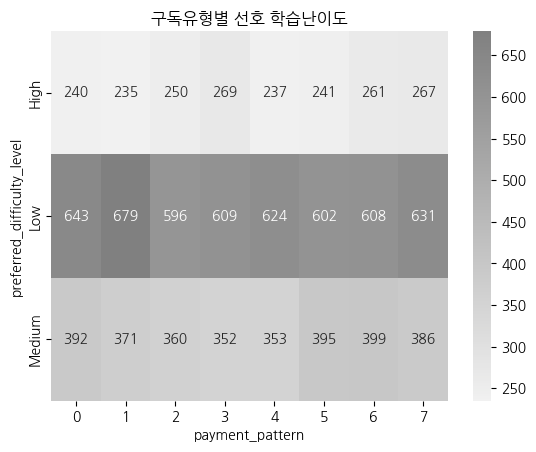

In [20]:
sns.heatmap(by_dif, cmap=sns.light_palette("gray", as_cmap=True), annot=True, fmt="d")
plt.title("구독유형별 선호 학습난이도")
plt.show()

# 전반적으로 모든 사용자가 선호하는 학습난이도는 'LOW'

- '낮은' 학습난이도를 선호하는 사용자가 많다 = '입문자'가 차지하는 비중이 크다
- <font color=blue> <b>(의견 4) 주요 타겟을 '입문자'</b></font>로 설정하되, Medium, High에 해당하는 콘텐츠로 이어지는 과정에서 <u>난이도의 갭</u>이 갑자기 커지는 일이 없도록 유의.
- 즉 <u>스캐폴딩* 설계</u>에 관심을 기울여야 사용자가 구독 상태를 연장할 가능성이 높아질 것 : 멘토링, 질의응답, 학습내용 리뷰 등 과도한 부담감을 느끼지 않고 학습을 이어갈 수 있는 다양한 장치 필요(*scaffolding : 학습자에게 적절한 인지적 도움, 안내를 제공하여 학습을 촉진하는 전략)
- <font color=blue> <b>(의견 5) 전반적인 콘텐츠 난이도 검토 & 사용자 리서치 병행 필요
- 어쩌면 우리가 제공하는 <u>콘텐츠 난이도가 전반적으로 "상향 평준화"</u>되어 <b>사용자 입장에선 어렵게 느껴지는 경우가 많다</b>는 것을 반증하는 메시지일 수 도 있다.

### 3-1. community_engagement_level (커뮤니티 참여도)
- '낮은' 학습 난이도를 선호하는 사람들의 커뮤니티 참여도를 확인해보자 (스캐폴딩)

In [21]:
by_dif2 = pd.pivot_table(data, values= 'user_id',
                            columns=['community_engagement_level'],
                            index=['preferred_difficulty_level'],
                            aggfunc="count")
by_dif2

community_engagement_level,1,2,3,4,5
preferred_difficulty_level,,,,,
High,222.0,257.0,376.0,431.0,714.0
Low,NaN,621.0,575.0,1020.0,2776.0
Medium,337.0,341.0,637.0,619.0,1074.0


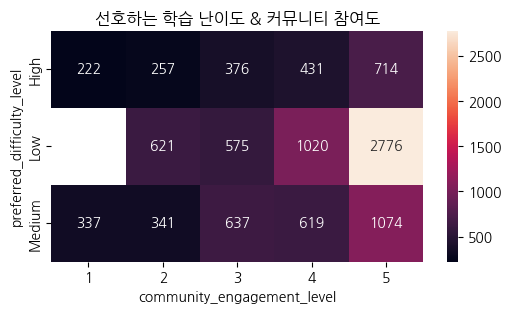

In [22]:
plt.figure(figsize=(6, 3))
sns.heatmap(by_dif2, annot=True, fmt="g")
plt.title("선호하는 학습 난이도 & 커뮤니티 참여도")
plt.show()

In [23]:
# 단위별 합계를 확인
by_dif3 = pd.pivot_table(data, values= 'user_id',
                            columns=['community_engagement_level'],
                            index=['preferred_difficulty_level'],
                            aggfunc="count", margins=True, margins_name='SUM')
by_dif3

community_engagement_level,1,2,3,4,5,SUM
preferred_difficulty_level,,,,,,
High,222.0,257.0,376.0,431.0,714.0,2000
Low,NaN,621.0,575.0,1020.0,2776.0,4992
Medium,337.0,341.0,637.0,619.0,1074.0,3008
SUM,559.0,1219.0,1588.0,2070.0,4564.0,10000


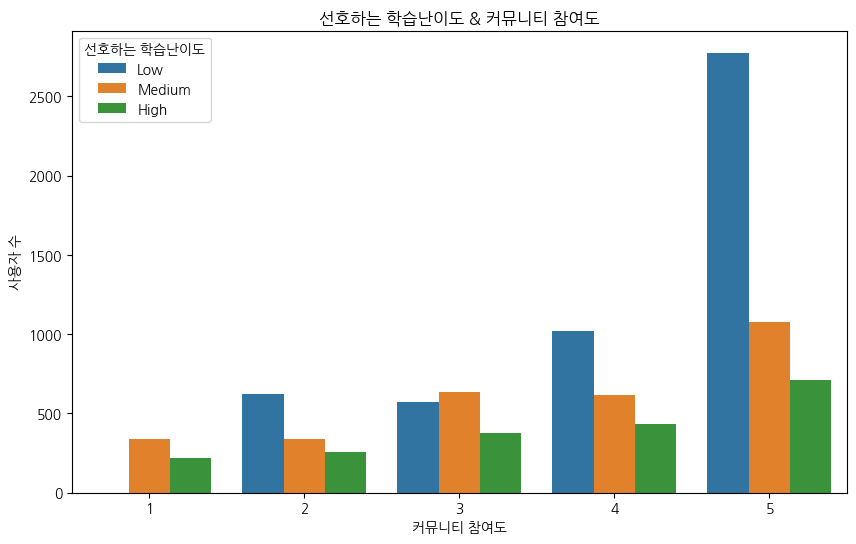

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='community_engagement_level', hue='preferred_difficulty_level', data=data)
plt.title('선호하는 학습난이도 & 커뮤니티 참여도')
plt.xlabel('커뮤니티 참여도')
plt.ylabel('사용자 수')
plt.legend(title='선호하는 학습난이도')
plt.show()

- 낮은 학습난이도를 선호하는 사용자가 커뮤니티 참여도가 높음.
- <b><font color=blue>(의견 4-1)</font></b> 낮은 학습난이도 선호하는 학습자들을 위해 <b>커뮤니티를 적극 활용</b>하는 것이 효과적일 것임

### <b> 현재 제공하고 있는 콘텐츠가 사용자에게 어렵게 느껴지는 것은 아닐까?  </b>

### 3-1. recent_learning_achievement (최근 학습성취도) 
- <b> '최근 학습성취도'의 정확한 산출 기준이 모호(단위 기간이 일? 주? 월?) </b>
- 주어진 데이터만으로는 '최근 학습성취도'가 의미하는 바가 정확히 무엇인지 알 수 없음
    - 단순 진도율을 의미하는가? : 이전 대비 수강완료한 콘텐츠 비율?
    - 중간 퀴즈, 평가 등의 결과로 산출하는 것인가?

In [25]:
# '최근 학습 성취도' 데이터 특성
ach_100=data[data['recent_learning_achievement'] > 100]
ach_100.count() # 학습 성취도가 100이상인 케이스가 58개?

user_id                              58
subscription_duration                58
recent_login_time                    58
average_login_time                   58
average_time_per_learning_session    58
monthly_active_learning_days         58
total_completed_courses              58
recent_learning_achievement          58
abandoned_learning_sessions          58
community_engagement_level           58
preferred_difficulty_level           58
subscription_type                    58
customer_inquiry_history             58
payment_pattern                      58
target                               58
dtype: int64

In [26]:
ach_100.describe()
# 성취도가 100 이상인 케이스의 평균은 102.7, 최대 112.6
# 성취도 100 이상인 케이스들의 편차는 크지 않은 것으로 추정

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,12.103448,14.965517,14.897912,46.590019,13.362069,12.362069,102.714526,3.086207,3.655172,1.775862,3.534483,0.637931
std,5.940316,8.043665,2.752758,40.129447,6.804793,3.887444,2.861135,1.667906,1.264241,1.271042,2.079267,0.484796
min,1.000000,1.000000,8.584948,0.534561,1.000000,6.000000,100.004153,0.000000,1.000000,0.000000,0.000000,0.000000
25%,8.250000,8.000000,13.078665,15.033626,8.000000,9.000000,100.793390,2.000000,3.000000,1.000000,2.000000,0.000000
50%,12.000000,14.000000,14.542966,33.262558,13.000000,12.000000,101.616337,3.000000,4.000000,2.000000,4.000000,1.000000
75%,16.000000,23.000000,17.133462,68.727126,18.000000,15.000000,103.729174,4.000000,5.000000,3.000000,5.000000,1.000000
max,23.000000,29.000000,20.019397,167.148239,24.000000,25.000000,112.643828,7.000000,5.000000,5.000000,7.000000,1.000000


In [27]:
recent_ach=data
recent_ach.describe()
# 전체 성취도 케이스의 평균은 75, 최소값은 35.9

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,2.010500,3.502900,0.619900
std,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,1.420983,2.311261,0.485435
min,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,1.000000,1.000000,0.000000
50%,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,2.000000,4.000000,1.000000
75%,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,3.000000,6.000000,1.000000
max,23.000000,29.000000,26.998490,503.372616,24.000000,27.000000,112.643828,12.000000,5.000000,10.000000,7.000000,1.000000


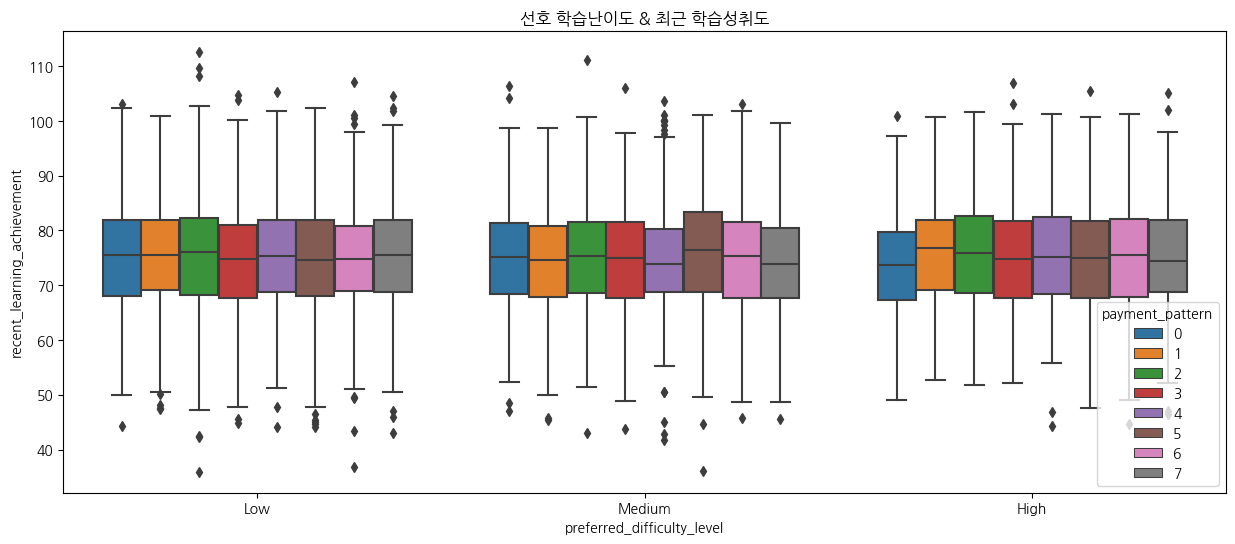

In [28]:
# 박스플롯 그려보기 (1)
plt.figure(figsize=(15, 6))
sns.boxplot(x="preferred_difficulty_level", y="recent_learning_achievement", hue="payment_pattern", data=recent_ach)
plt.title("선호 학습난이도 & 최근 학습성취도")
plt.show()

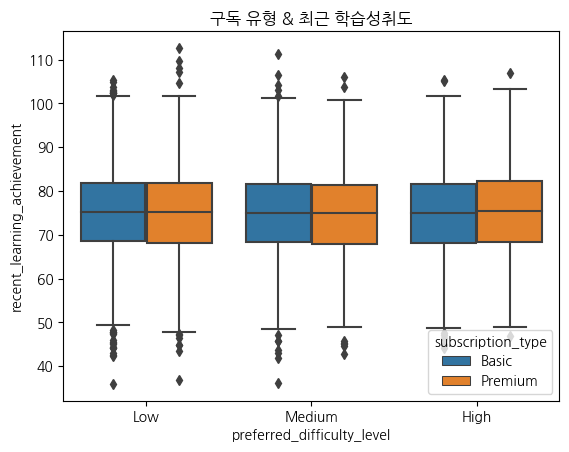

In [29]:
# 박스플롯 그려보기 (2)
sns.boxplot(x="preferred_difficulty_level", y="recent_learning_achievement", hue="subscription_type", data=recent_ach)
plt.title("구독 유형 & 최근 학습성취도")
plt.show()

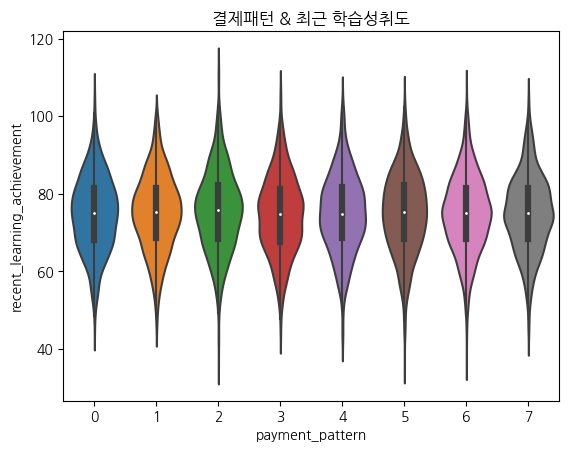

In [30]:
# 바이올린 플롯 그려보기 
sns.violinplot(x="payment_pattern", y="recent_learning_achievement", data=recent_ach)
plt.title("결제패턴 & 최근 학습성취도")
plt.show()

In [31]:
import numpy as np

# 성취도 최소값과 최대값을 이용하여 범주 설정
min_value = recent_ach['recent_learning_achievement'].min()
max_value = recent_ach['recent_learning_achievement'].max()

# 원하는 bin과 label 설정 
# bins3 생성 시, 중복된 값이 있기 때문에 (np.linspace 대신) np.histogram 사용하여 구간 생성
# 히스토그램 생성결과로부터 구간 경계값(edges) 사용 -> 중복된 값이 없므로 중복문제 해결

hist, edges = np.histogram(recent_ach['recent_learning_achievement'], bins=5)
labels3 = ['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High']
# 시각화 단계에서 학습성취도 중간수준이 가장 많아 보여서 세분화(5단계)

In [32]:
# recent_learning_achievement 값을 기반으로 범주화
# qcut은 기본적으로 중복된 레이블을 허용하지 않음 = order 인수 사용 불가
# cut 사용(직접 구간설정) : ordered=False -> 중복 레이블 허용

ach_category = pd.cut(recent_ach['recent_learning_achievement'], bins=edges, labels=labels3, include_lowest=True, ordered=False)

In [33]:
# 범주화 결과를 데이터프레임으로 변환
ach_category = pd.DataFrame(ach_category)
ach_category = ach_category.rename(columns={'recent_learning_achievement': 'ach_category'})

ach_category.tail()

,ach_category
9995,Medium-Low
9996,Medium-High
9997,Medium
9998,Medium-High
9999,Medium-Low


In [34]:
ach_category

,ach_category
0,Medium
1,High
2,Medium-High
3,Medium
4,Medium
...,...
9995,Medium-Low
9996,Medium-High
9997,Medium
9998,Medium-High


In [35]:
data4 = pd.concat([recent_ach, ach_category], axis=1, join='inner')
data4.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target,ach_category
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0,Medium
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1,High
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1,Medium-High
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1,Medium
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1,Medium


In [36]:
# 범주화 체크 -> df
ach_category = pd.DataFrame(data4[['user_id', 'ach_category','preferred_difficulty_level', 'total_completed_courses', 'abandoned_learning_sessions']])
ach_category.head()

,user_id,ach_category,preferred_difficulty_level,total_completed_courses,abandoned_learning_sessions
0,b919c29d,Medium,Low,16,3
1,a0a60abb,High,Medium,13,2
2,b9f171ae,Medium-High,Medium,14,3
3,5dc0ba8b,Medium,Low,18,0
4,65c83654,Medium,Medium,10,2


In [39]:
ach_category_count = ach_category.groupby('ach_category')['user_id'].count()
ach_category_count

ach_category
Low              84
Medium-Low     1898
Medium         5599
Medium-High    2284
High            135
Name: user_id, dtype: int64

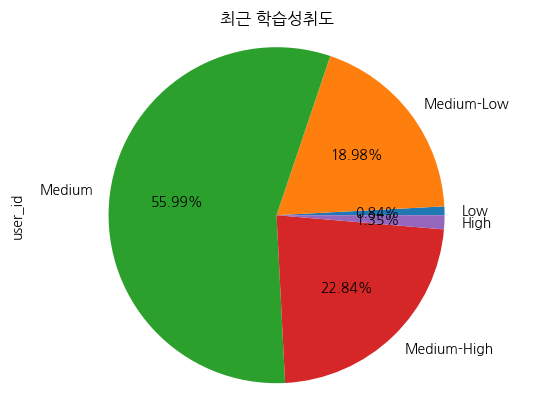

In [40]:
# 최근 학습성취도 분포 : 'Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'
figure_size=(8,8)
ach_category_count.plot.pie(autopct='%.2f%%')
plt.title("최근 학습성취도")
plt.axis('equal')
plt.show()

# Low: 0.84 %  # High: 1.35 %

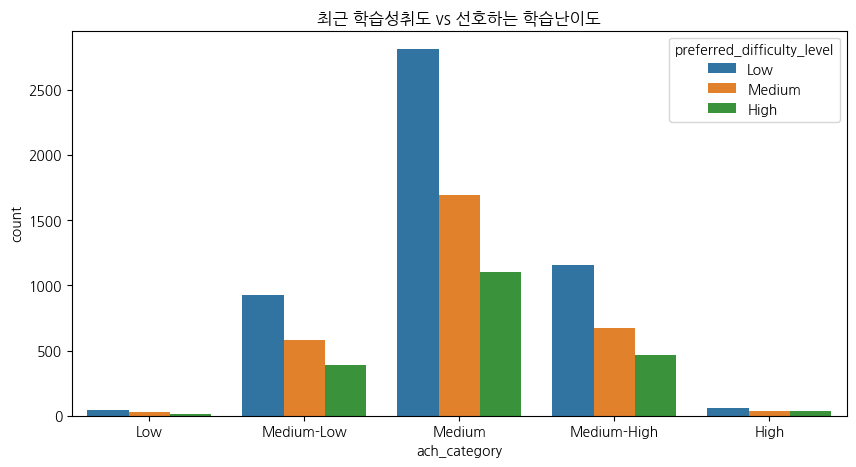

In [41]:
plt.figure(figsize=(10, 5))
sns.countplot(x="ach_category", hue="preferred_difficulty_level", data=ach_category)
plt.title("최근 학습성취도 vs 선호하는 학습난이도")
plt.show()

- 다행히 낮은 학습난이도를 선호하는 사용자의 성취도가 크게 떨어지지 않고 적정선을 유지하고 있는 것으로 보임
- 전반적으로 선호하는 난이도와 관계없이 학습성취도가 크게 떨어지거나 높아진 케이스가 눈에 띄지 않음 : 일반적인 패턴
- 콘텐츠 난이도가 상향평준화되어 사용자에게 심각한 부담감을 일으키는 것은 아닐 것으로 판단됨

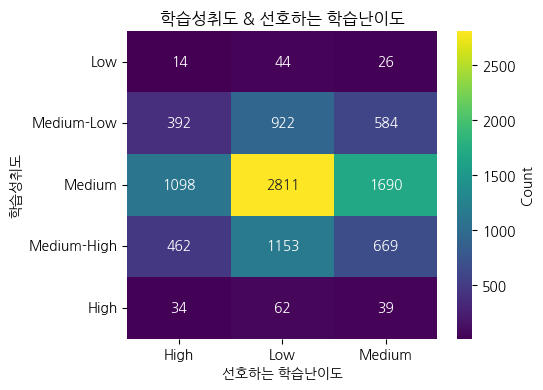

In [42]:
# Cross-tabulation으로 범주별 Count 구하기
cross_tab = pd.crosstab(ach_category['ach_category'], ach_category['preferred_difficulty_level'])

plt.figure(figsize=(5, 4))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap="viridis", cbar_kws={'label': 'Count'})
plt.title("학습성취도 & 선호하는 학습난이도")
plt.xlabel("선호하는 학습난이도")
plt.ylabel("학습성취도")
plt.show()


- 다만 낮은 학습난이도를 선호하는 학습자의 다수가 보통 수준(Medium)의 성취도를 나타낸다는 점에서,
- <font color=blue><b>(의견 5-1)</font> 이들의 학습 성취도를 중상(Medium-High) 이상으로 견인할 장치 마련을 권장함
    - 높은 학습성취도 -> 학습 지속성 향상 -> 구독 연장의 추진력으로 작용

Text(0, 0.5, '완료한 코스 수')

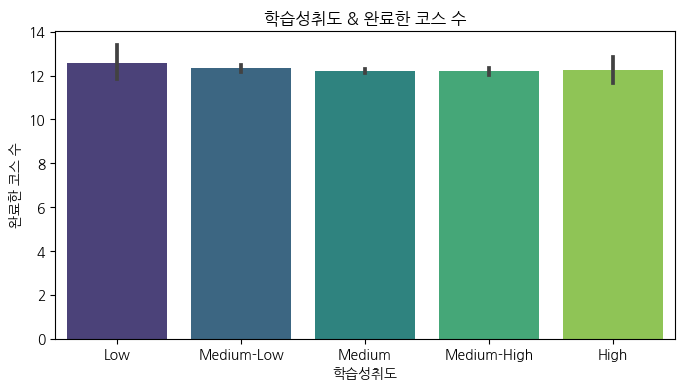

In [43]:
plt.figure(figsize=(8, 4))

sns.barplot(x="ach_category", y="total_completed_courses", data=ach_category, palette="viridis")
plt.title("학습성취도 & 완료한 코스 수")

plt.xlabel("학습성취도")
plt.ylabel("완료한 코스 수")

Text(0, 0.5, '중단된 세션 수')

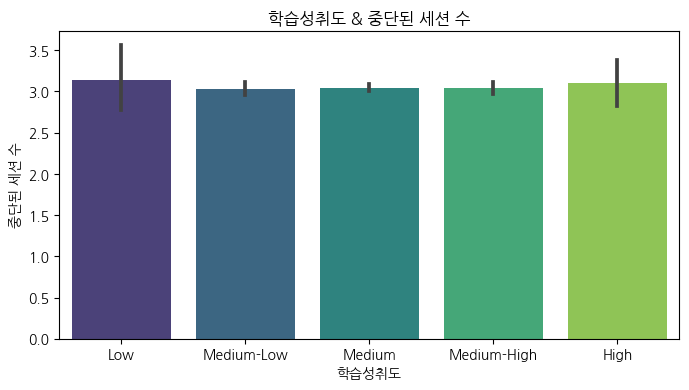

In [44]:
plt.figure(figsize=(8, 4))

sns.barplot(x="ach_category", y="abandoned_learning_sessions", data=ach_category, palette="viridis")
plt.title("학습성취도 & 중단된 세션 수")

plt.xlabel("학습성취도")
plt.ylabel("중단된 세션 수")

- 또한 중간 층에서의 중단된 세션, 완료한 코스 수의 편차에 비해 Low, High 층의 편차가 두드러지게 나타남
- 특히 중단된 세션에서의 편차가 완료한 코스 편차보다 크게 나타남
- 전체적으로 보았을 땐 성취도 수준이 일반적인 패턴을 보였지만, <u>Low와 High를 보았을 때</u> <b>중단된 세션의 편차가 완료한 코스의 편차 보다 크다</b>는 점에 주목할 필요가 있음.
- <font color=blue><b>(의견 5-2)</font> 2차 분석을 위해서...
    - (1) 학습성취도가 낮은/높은 사용자들이 각각 <u>"어떤 코스"의 "어느 세션"에서 많이 중단</u>했는지 분석
    - (2) 분석 시점을 중심으로 세션을 중단하고 <u>몇 일이 경과한 것인지</u> 확인
    - (3) 자주 언급된 세션에서 중단한 사용자 그룹에서 인터뷰 대상 선정, <b>세션 중단의 직접적인 원인</b> 파악 : 난이도(너무 어려워서, 너무 쉬워서 중단)의 문제인지 흥미의 문제인지, 기타 사유에 의한 것인지

### 3-3. abandoned_learning_sessions & preferred_difficulty_level 
- 중단된 학습 세션 수 & 선호하는 학습난이도 

In [45]:
pref_aban = pd.pivot_table(data, values='user_id', index='preferred_difficulty_level', 
                           columns='abandoned_learning_sessions', aggfunc='count', fill_value=0)
pref_aban

abandoned_learning_sessions,0,1,2,3,4,5,6,7,8,9,10,11,12
preferred_difficulty_level,,,,,,,,,,,,,
High,106,314,446,447,319,199,102,41,17,5,3,1,0
Low,219,729,1085,1097,882,517,267,131,47,13,2,1,2
Medium,139,442,695,651,503,310,161,65,27,9,4,2,0


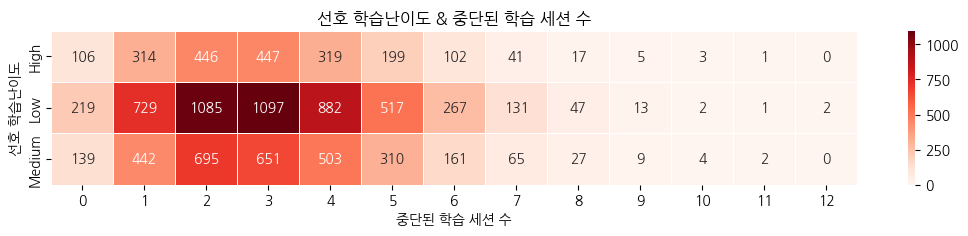

In [46]:
plt.figure(figsize=(13, 2))
sns.heatmap(pref_aban, cmap='Reds', annot=True, fmt='d', linewidths=.5)
plt.title('선호 학습난이도 & 중단된 학습 세션 수')
plt.xlabel('중단된 학습 세션 수')
plt.ylabel('선호 학습난이도')
plt.show()

### 3-3. total_completed_courses & preferred_difficulty_level 
- 완료한 코스 수 & 선호하는 학습난이도

In [47]:
pref_comp = pd.pivot_table(data, values='user_id', index='preferred_difficulty_level', 
                           columns='total_completed_courses', aggfunc='count', fill_value=0)
pref_comp

total_completed_courses,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,26,27
preferred_difficulty_level,,,,,,,,,,,,,,,,,,,,,
High,1,3,11,25,47,67,134,174,202,203,...,37,26,8,7,0,5,0,0,0,0
Low,0,0,0,6,27,49,122,182,286,433,...,231,129,90,44,28,19,12,7,4,3
Medium,0,7,12,29,81,122,186,243,318,308,...,58,35,17,11,2,3,0,0,1,0


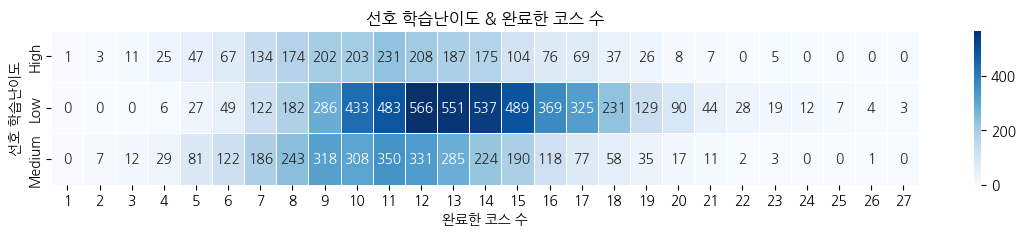

In [48]:
plt.figure(figsize=(14, 2))
sns.heatmap(pref_comp, cmap='Blues', annot=True, fmt='d', linewidths=.5)
plt.title('선호 학습난이도 & 완료한 코스 수')
plt.xlabel('완료한 코스 수')
plt.ylabel('선호 학습난이도')
plt.show()

- 낮은 학습난이도를 선호하는 사용자 그룹 내에서 '완료한 코스의 수'와 '중단된 세션의 수' 모두 가장 높은 수치가 나왔다는 점에 집중
- <font color=blue><b>(의견 5-3)</b></font> <u>사용자의 눈높이에서</u> <b> 전반적인 학습난이도 검토, 학습 로드맵 보완에 대한 내부적인 논의가 필요함

## 4. average_time_per_learning_session (각 학습 세션에 소요된 평균 시간_분)
- 각 학습 세션에 소요된 평균 시간(분)을 살펴보자 (콘텐츠별 실제 러닝타임은 모르지만...)

Pearson Correlation Coefficient: -0.007381827485785872


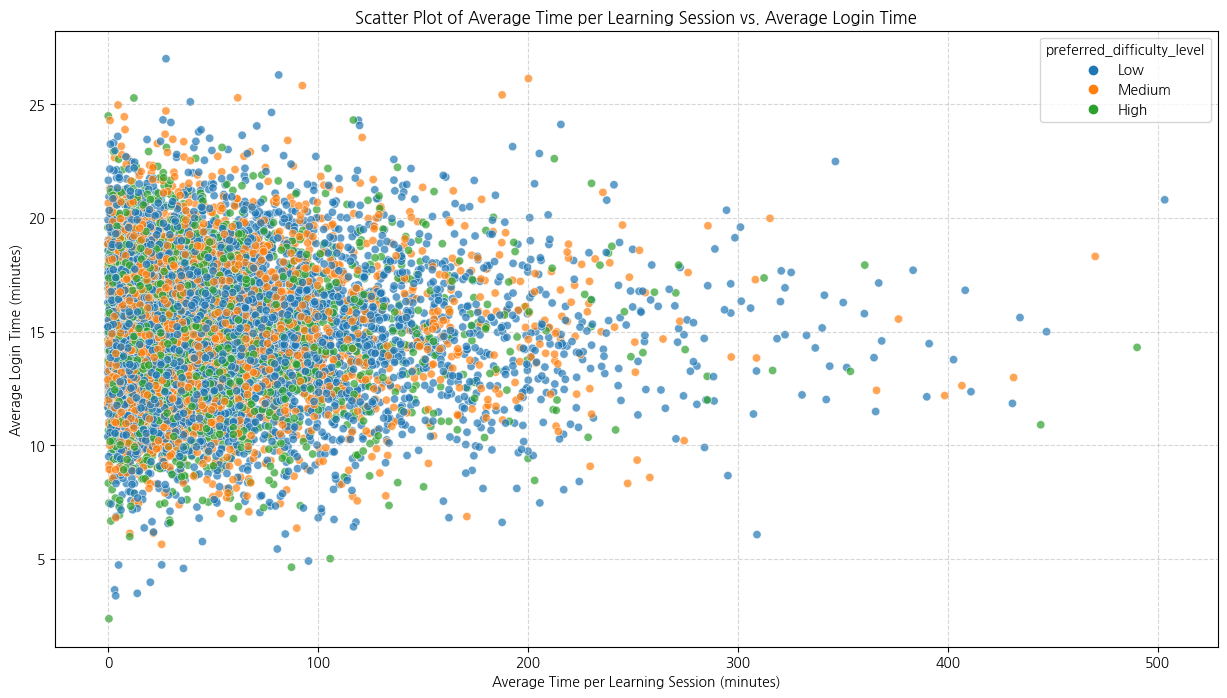

In [49]:
# Pearson 상관계수 계산
correlation = data['average_time_per_learning_session'].corr(data['average_login_time'])
print(f"Pearson Correlation Coefficient: {correlation}")

# 산점도 그래프
plt.figure(figsize=(15, 8))
scatter_plot = sns.scatterplot(x='average_time_per_learning_session', y='average_login_time', data=data, hue="preferred_difficulty_level", alpha=0.7)
scatter_plot.set_title('Scatter Plot of Average Time per Learning Session vs. Average Login Time')
scatter_plot.set_xlabel('Average Time per Learning Session (minutes)')
scatter_plot.set_ylabel('Average Login Time (minutes)')

# 그리드 추가
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


- 사용자들이 '하나의 세션에 투입한 평균 시간'은 200분 이내, '평균 로그인 시간'은 약 25분 이내에 집중되어 있음
- <font color=blue><b>(의견 6)</font></b> 최소 단위 학습콘텐츠의 러닝타임은 <b><u>8~10분(200/25) 이내</u></b>가 효과적임 : '마이크로러닝'으로 학습부담감 완화
- <b>학습 콘텐츠별 러닝타임 확인 필요

## 5. recent_login_time (최근 로그인한 시간_일)
- 평균 15일(=중앙값), 최소 1일, 최대 29일

In [50]:
# 사용자가 마지막으로 접속한 시간을 '범주화' 하기
bins2 = [1, 2, 6, 11, 16, 21, 26, 29] 
labels2=['어제', '2~5일 전', '6~10일 전','11~15일 전', '16~20일 전', '21~25일 전', '26일~한달 전']

In [52]:
last_login = pd.cut(data['recent_login_time'], bins=bins2, labels=labels2, right=True, include_lowest=True)
last_login.head()

0    11~15일 전
1    16~20일 전
2          어제
3    16~20일 전
4      2~5일 전
Name: recent_login_time, dtype: category
Categories (7, object): ['어제' < '2~5일 전' < '6~10일 전' < '11~15일 전' < '16~20일 전' < '21~25일 전' < '26일~한달 전']

In [53]:
# 범주화 결과를 데이터프레임으로 변환
last_login = pd.DataFrame(last_login)
# 컬럼명 변경
last_login = last_login.rename(columns={'recent_login_time': 'last_login'})
last_login.tail()

,last_login
9995,26일~한달 전
9996,6~10일 전
9997,26일~한달 전
9998,6~10일 전
9999,2~5일 전


In [54]:
data3 = pd.concat([data, last_login], axis=1, join='inner')
data3.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target,last_login
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0,11~15일 전
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1,16~20일 전
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1,어제
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1,16~20일 전
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1,2~5일 전


In [55]:
# 내가 보고싶은 컬럼만 다시 필터링, 범주화 체크 -> df
last_access = pd.DataFrame(data3[['user_id', 'last_login', 'recent_login_time']])
last_access.head()

,user_id,last_login,recent_login_time
0,b919c29d,11~15일 전,14
1,a0a60abb,16~20일 전,18
2,b9f171ae,어제,1
3,5dc0ba8b,16~20일 전,19
4,65c83654,2~5일 전,5


In [56]:
user_count = last_access.groupby('last_login')['user_id'].count()
user_count

last_login
어제           697
2~5일 전      1398
6~10일 전     1635
11~15일 전    1766
16~20일 전    1765
21~25일 전    1697
26일~한달 전    1042
Name: user_id, dtype: int64

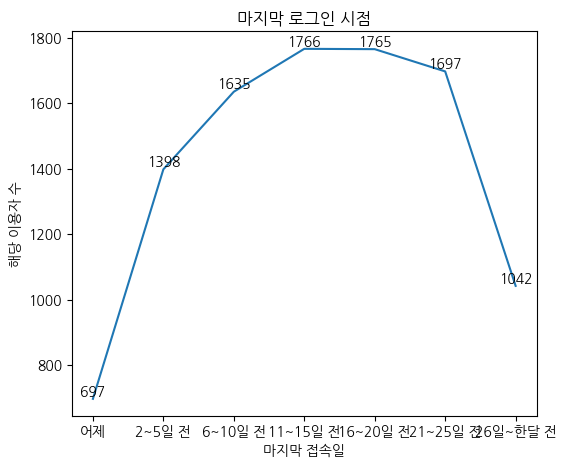

In [58]:
plt.figure(figsize=(6,5))
user_count.plot()

for i, value in enumerate(user_count):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
    
plt.title("마지막 로그인 시점")
plt.xlabel("마지막 접속일")
plt.ylabel("해당 이용자 수")
plt.show()


- 하루 전과 두번째 구간(2~5일 전) 사이의 갭이 가장 큰 것으로 나타남 : 하루만에 재접속하는 사람은 약 7%에 불과
    - 이 부분은 분석 시점이 무슨 요일인지에 따른 영향이 클 것으로 예상(월요일에 분석 시 -> 주말 접속자가 평일보다 많을 것) => 날짜 데이터 없으므로 확인 불가
- 마지막 접속 시점으로부터 15일 전 까지는 재접속 사용자가 지속적으로 증가, 16일 이상 경과한 시점부터 재접속자 수가 감소하는 추세 
- <font color=blue><b> (의견 7) 마지막 접속일로부터 15일 전후를 기준으로 </b></font> 15일 이내 접속한 사용자에겐 <u>독려 메시지</u>, 16일 이상 경과한 사용자에겐 <u>동기부여 메시지</u> 발송

In [59]:
by_login = pd.pivot_table(data3, values= 'user_id',
                            columns=['payment_pattern'],
                            index=['last_login'],
                            aggfunc="count")
by_login

payment_pattern,0,1,2,3,4,5,6,7
last_login,,,,,,,,
어제,88,100,81,86,84,76,87,95
2~5일 전,183,179,163,165,177,176,179,176
6~10일 전,211,206,216,190,209,208,196,199
11~15일 전,248,236,210,209,205,218,215,225
16~20일 전,196,219,213,235,220,204,242,236
21~25일 전,213,214,194,204,214,237,197,224
26일~한달 전,136,131,129,141,105,119,152,129


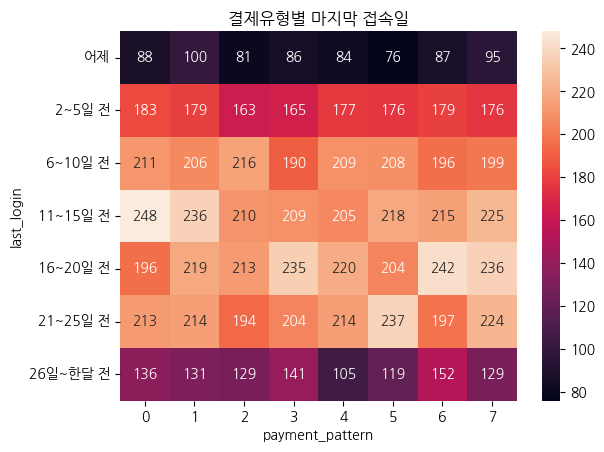

In [60]:
sns.heatmap(by_login, annot=True, fmt="d")
plt.title("결제유형별 마지막 접속일")
plt.show()

## 6. monthly_active_learning_days (월간 활동적인 학습 일수)
- 평균 12.5일, 최소 1일, 최대 24일

In [61]:
data.describe()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,2.010500,3.502900,0.619900
std,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,1.420983,2.311261,0.485435
min,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,1.000000,1.000000,0.000000
50%,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,2.000000,4.000000,1.000000
75%,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,3.000000,6.000000,1.000000
max,23.000000,29.000000,26.998490,503.372616,24.000000,27.000000,112.643828,12.000000,5.000000,10.000000,7.000000,1.000000


In [62]:
# 월간 활성 학습 일수 '범주화' 하기
bins = [1, 3, 6, 9, 12, 15, 18, 21, 24] 
labels=['1~3일', '4~6일','7~9일', '10~12일', '13~15일', '16~18일', '19~21일', '22~24일']

In [63]:
act_study = pd.cut(data['monthly_active_learning_days'], bins=bins, labels=labels, right=True, include_lowest=True)
act_study.head()

0    16~18일
1    16~18일
2    13~15일
3    19~21일
4    19~21일
Name: monthly_active_learning_days, dtype: category
Categories (8, object): ['1~3일' < '4~6일' < '7~9일' < '10~12일' < '13~15일' < '16~18일' < '19~21일' < '22~24일']

In [64]:
# 범주화 결과를 데이터프레임으로 변환
act_study = pd.DataFrame(act_study)
act_study = act_study.rename(columns={'monthly_active_learning_days': 'act_study'})

act_study.tail()

,act_study
9995,16~18일
9996,7~9일
9997,22~24일
9998,10~12일
9999,1~3일


In [65]:
data2 = pd.concat([data, act_study], axis=1, join='inner')
data2.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target,act_study
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0,16~18일
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1,16~18일
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1,13~15일
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1,19~21일
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1,19~21일


In [66]:
# 범주화 체크 -> df
active_study = pd.DataFrame(data2[['user_id', 'act_study', 'monthly_active_learning_days']])
active_study.tail()

,user_id,act_study,monthly_active_learning_days
9995,ae6b76bc,16~18일,18
9996,24588752,7~9일,9
9997,e4622a54,22~24일,24
9998,e07fbad9,10~12일,10
9999,e12dcb55,1~3일,3


In [67]:
study_count = active_study.groupby('act_study')['user_id'].count()
study_count

act_study
1~3일      1204
4~6일      1275
7~9일      1289
10~12일    1226
13~15일    1232
16~18일    1223
19~21일    1291
22~24일    1260
Name: user_id, dtype: int64

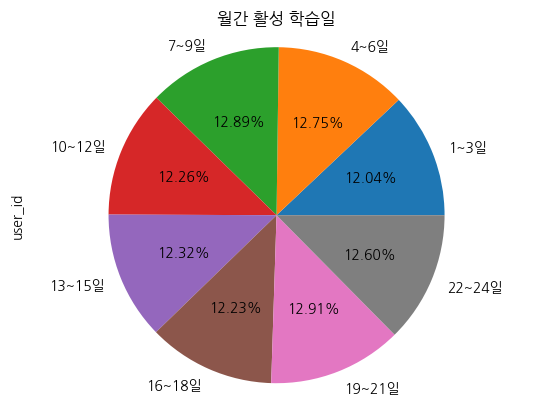

In [68]:
figure_size=(10,10)
study_count.plot.pie(autopct='%.2f%%')
plt.title("월간 활성 학습일")
plt.axis('equal')
plt.show()

- '월간 활성 학습일'을 1~24일을 3일 단위로 범주화 -> 월간 활성 학습일 수가 고르게 분포한 것을 확인
- <font color=blue><b>(의견 8)</font></b> 작심삼일? 독려/동기부여 메시지는 3일 간격으로 발송하는 것이 적정하지 않을까? 너무 자주 보내면 스팸메시지처럼 느껴질 수 있으니까?